# Atividade: Agrupamento de Dados

Giovanna Zolin Pinheiro Hayasida - n:9762848

1.Baixar a base de dados que foi disponibilizada na atividade, entender como ela está estruturada, e fazer a leitura dos dados. 

In [1]:
#Importando pacotes
import random
random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt

#Lendo o arquivo CSV com os dados
data = pd.read_csv('words_data.csv', header= None)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,car,0.130859,0.008423,0.033447,-0.058838,0.040039,-0.142578,0.049316,-0.168945,0.208984,...,-0.275391,0.285156,-0.047363,0.064941,-0.112305,-0.025757,-0.041260,0.228516,-0.149414,-0.150391
1,bus,0.059326,-0.169922,0.038818,-0.049561,0.038330,-0.153320,-0.166016,-0.443359,0.239258,...,-0.011108,0.079590,0.130859,-0.211914,0.073730,0.081055,-0.158203,0.474609,0.059814,-0.244141
2,drive,-0.025879,0.097656,0.008972,-0.097656,-0.122070,-0.103516,0.030762,-0.167969,-0.006622,...,-0.011780,0.380859,-0.181641,0.257812,0.113281,-0.069336,-0.016479,-0.025635,-0.076172,-0.127930
3,road,0.111816,0.263672,0.085938,-0.083984,0.146484,-0.031738,-0.194336,-0.261719,-0.000030,...,-0.050781,0.035156,-0.292969,0.000927,0.032227,-0.038818,-0.110840,-0.067383,0.230469,-0.231445
4,devil,0.287109,-0.186523,0.161133,0.182617,-0.174805,0.367188,-0.018677,-0.026978,0.125977,...,-0.005371,-0.064941,-0.093262,-0.104980,-0.414062,0.026123,0.337891,-0.033203,-0.195312,0.028687


2. Agrupar os dados por meio do algoritmo de agrupamento K-Means. Um dos parâmetros desse algoritmo é número de grupos a serem gerados. Escolha 3 grupos.

In [2]:
import numpy as np
#Listando nomes das colunas
list_labels = list(data.columns)

#Selecionando a coluna contendo as classes e armazenando em Y.
Y = np.array(data[list_labels[0]],dtype=str)

#Retirando a coluna com as classes de data e armazenando em X.
data= data.drop(list_labels[0], axis = 1)

#Salvando os nomes das características para uso posterior.
data_list = list(data.columns)

#Convertando num numpy array
X = np.array(data)

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [4]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(X)

[[ 2.08740235e-01  8.05663875e-03  1.62353515e-01  8.89892590e-02
  -2.06947331e-02  1.57928466e-01 -2.75573740e-02 -1.61834716e-01
   1.38793944e-01  2.06542970e-01  8.33129895e-02 -1.76269532e-01
  -1.50268557e-01  1.33252132e-02 -1.69799806e-01  2.88085963e-02
   2.79235840e-02  5.14221205e-02  6.65893550e-02 -1.25427244e-01
   8.50830090e-02 -1.40380870e-02 -2.92968750e-02 -4.97436515e-02
  -2.70614630e-02  9.00878925e-02  4.68444725e-03 -9.76562488e-02
   1.36779786e-01 -2.70385743e-01 -3.94549376e-02  1.53381348e-01
   4.77218635e-02  5.21240240e-02 -4.09927359e-02 -7.74765025e-03
   1.34094239e-01 -1.22650143e-01 -1.22802732e-01  2.23388672e-01
   1.71508790e-01 -1.20971680e-01  2.32360841e-01 -4.03747583e-02
  -4.66308575e-02  6.29882805e-02  5.56640625e-02 -9.34600830e-02
  -4.43725580e-02  4.13818381e-02 -2.22900393e-01  2.58178715e-01
   7.73925770e-02 -5.79833975e-02  8.90808105e-02 -1.42578125e-01
  -1.11267089e-01 -1.40014647e-01  6.37207025e-02  5.54351813e-02
   3.82080

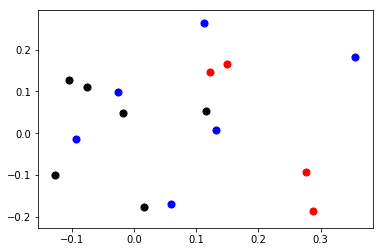

In [6]:
plt.scatter(X[y_km ==0,0], X[y_km == 0,1], s=50, c='red')
plt.scatter(X[y_km ==1,0], X[y_km == 1,1], s=50, c='black')
plt.scatter(X[y_km ==2,0], X[y_km == 2,1], s=50, c='blue')
plt.scatter(X[y_km ==3,0], X[y_km == 3,1], s=50, c='cyan')
#plt.xlim(-15,15)
#plt.ylim(-15,15)
plt.show(True)

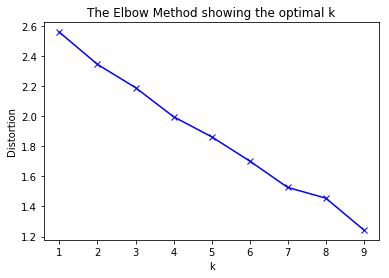

In [14]:
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.average(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)))

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()